# Case Study Based on Geo Spatial Data

Summary : Geo spatial data is a data that includes information realated to locations on the Earth's surface. Here I have done case study on the distribution and availability of parking spaces in a particular city.The task is to check the distribution of parking spaces in the vicinities and compare using different types of charts.

 We use the following libraries:

- `geopandas` to load a GeoJSON dataset.
- `folium` to create an interactive map.
- `matplotlib` for creating bar and pie charts.
- `pandas` for data manipulation.

### Loading the GeoJSON Dataset

We start by loading a GeoJSON dataset. Make sure to replace `'export.geojson'` with the path or URL of your dataset.

```python
gdf = gpd.read_file('export.geojson')

1)Creating an Interactive Map

We create a map centered around Hamburg, Germany using the folium library and initialize variables to count the number of parking spaces.

m = folium.Map(location=[53.5511,9.9937],zoom_start=13)

parking_space=0.

2)Adding Markers to the Map

We iterate through the GeoDataFrame, categorizing parking lots and spaces. We add markers to the map with Font Awesome icons representing them


In [ ]:
from google.colab import files
uploaded = files.upload()

# Import required libraries
import geopandas as gpd
import folium

# Replace 'your_uploaded_file.geojson' with the actual file name from the 'uploaded' dictionary.
dataset_path = 'vienna.geojson'
# Load the dataset
gdf = gpd.read_file(dataset_path)

# Visualize the dataset
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=15)
folium.GeoJson(gdf).add_to(m)
m

Saving vienna.geojson to vienna.geojson


<ipython-input-6-fe80d2955e0c>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=15)


3)Creating Bar and Pie Charts

We use matplotlib to create bar and pie charts to visualize the counts of parking spaces. We also annotate the bars with counts and display the charts.


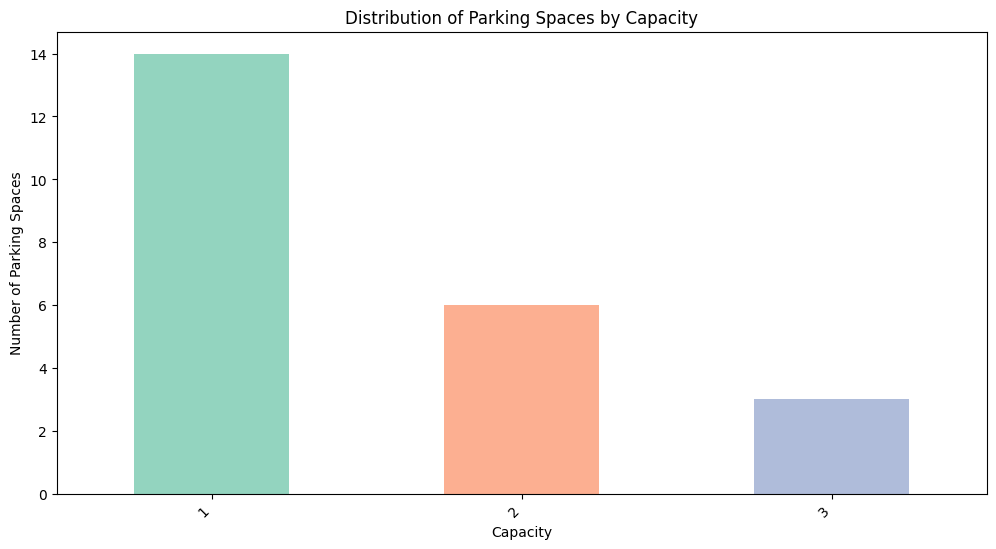

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = "vienna.geojson"
parking_data = gpd.read_file(cleaned_file_path)
import numpy as np
# Filter to include only Point geometries
point_data = parking_data[parking_data.geometry.type == 'Point']

# Group by capacity and count occurrences
capacity_counts = point_data['capacity'].value_counts()

# Define a list of colors for the bar chart
colors = plt.cm.Set2(np.arange(len(capacity_counts)))

# Create a bar chart using the specified colors
plt.figure(figsize=(12, 6))
capacity_counts.sort_index().plot(kind='bar', color=colors, alpha=0.7)
plt.title("Distribution of Parking Spaces by Capacity")
plt.xlabel("Capacity")
plt.ylabel("Number of Parking Spaces")
plt.xticks(rotation=45, ha='right')
plt.show()

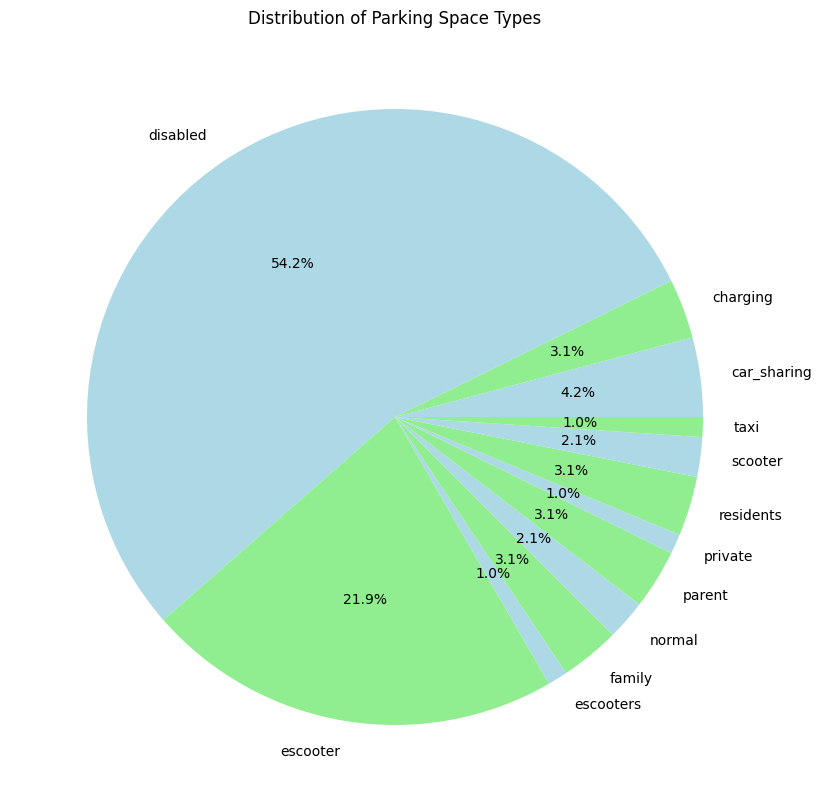

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

cleaned_file_path = "vienna.geojson"
parking_data = gpd.read_file(cleaned_file_path)

# Assuming parking_data is a DataFrame with a 'parking_space' column
# Group by parking space type and count occurrences
parking_space_type_counts = parking_data['parking_space'].value_counts()

# Sort the values by index (category) to ensure a consistent order
parking_space_type_counts = parking_space_type_counts.sort_index()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(parking_space_type_counts, labels=parking_space_type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title("Distribution of Parking Space Types")
plt.show()

In [2]:
pip install folium


4)Creating Heat map for parking spaces

we import folium to show the density of parking spaces in the city.

In [6]:
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the GeoDataFrame with pedestrian paths or sidewalks
pedestrian_data = gpd.read_file("vienna.geojson")


# Create a Folium map centered around the pedestrian data
map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# Convert the GeoDataFrame to a list of coordinates
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in pedestrian_data.geometry.centroid]

# Add HeatMap to the map
plugins.HeatMap(heat_data).add_to(mymap)

# Display the map
display(mymap)


<ipython-input-6-8fdb1a15d00b>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]
<ipython-input-6-8fdb1a15d00b>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data = [[point.xy[1][0], point.xy[0][0]] for point in pedestrian_data.geometry.centroid]
